<CENTER><h1>Dimuon spectrum | CMS pyROOT notebook example</h1></CENTER>

<p><b>Reference:</b> https://swan.web.cern.ch/notebook-galleries</p>

In [1]:
import ROOT

Welcome to ROOTaaS 6.06/08


In [2]:
inputFileName = 'MuRun2010B.csv'
import os
if not os.path.exists(inputFileName):
    import urllib2
    ##response = urllib2.urlopen('https://raw.githubusercontent.com/dpiparo/swanExamples/master/notebooks/MuRun2010B.csv')
    response = urllib2.urlopen('./MuRun2010B.csv')
    filecontent = response.read()   
    with open(inputFileName,"w") as f_out:
        f_out.write(filecontent)

In [3]:
dimuons = ROOT.TTree("MuonPairs","MuonPairs")
dimuons.ReadFile(inputFileName)

100000L

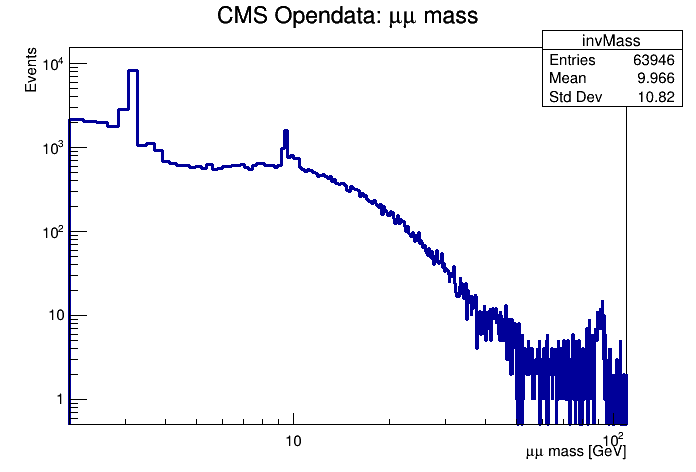

In [4]:
invMass = ROOT.TH1F("invMass","CMS Opendata: #mu#mu mass;#mu#mu mass [GeV];Events",512, 2, 110)
invMassFormula = "sqrt((E1 + E2)^2 - ((px1 + px2)^2 + (py1 + py2)^2 + (pz1 + pz2)^2))"
cut = "Q1*Q2==-1"
c = ROOT.TCanvas()
dimuons.Draw(invMassFormula + " >> invMass",cut,"hist")
c.SetLogx()
c.SetLogy()
c.Draw()